In [1]:
from powerspectra import Powerspectra
from modecoupling import Modecoupling
import postborn
import time
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.offsetbox import AnchoredText
from cosmology import Cosmology
import numpy as np
from noise import Noise
from fisher import Fisher
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['xtick.major.pad']='8'
plt.rc('figure', facecolor='w')
power = Powerspectra()
cosmo = Cosmology()
fisher = Fisher()
fisher.setup_bispectra()
_noise = fisher.covariance.noise

In [3]:
omega_Ls, omega_ps = cosmo.get_postborn_omega_ps(ellmax=8000)
my_omega_ps = postborn.omega_ps(omega_Ls)
my_gal_omega_ps = postborn.omega_ps(omega_Ls, cmb=False)

In [4]:
class Exp():
    def __init__(self):
        self.counter = 0
        self.exps = {}
        self.colours = []
    def add_exp(self, name, colour):
        self.exps[name] = self.counter
        self.colours.append(colour)
        self.counter += 1
    def get_colour(self, exp):
        return self.colours[self.exps[exp]]
    def get_exps(self):
        return self.exps.keys()

In [5]:
exps = Exp()
exps.add_exp("SO_base", u'#ff7f0e')
exps.add_exp("SO_goal", u'#1f77b4')
exps.add_exp("S4_base", u'#2ca02c')


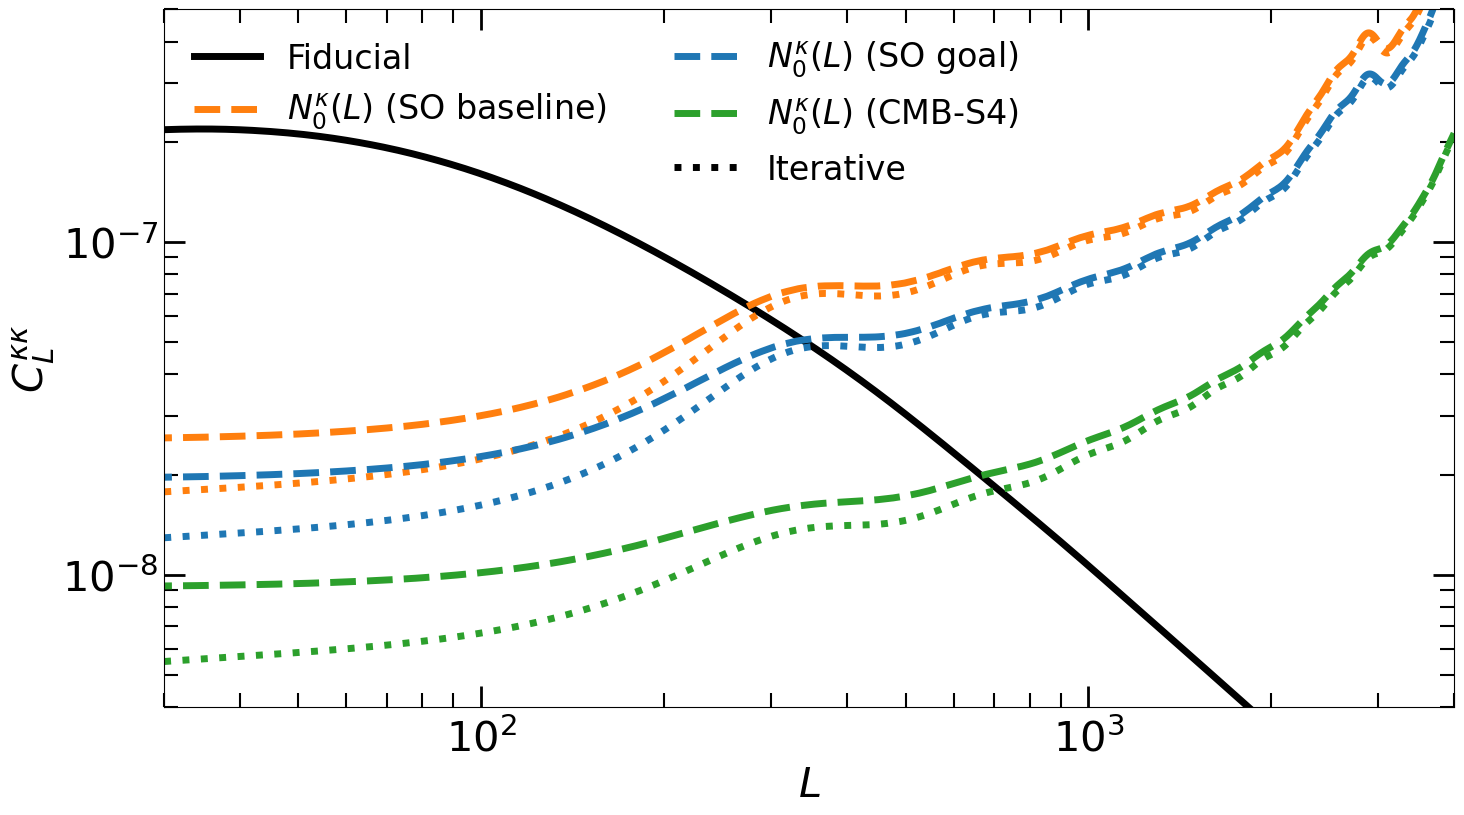

In [52]:
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)

ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_kk = power.get_kappa_ps(ells)
ax.loglog(ells, Cl_kk, label="Fiducial", linewidth=5, color="k")

labels = ["SO baseline", "SO goal", "CMB-S4"]
for iii, exp in enumerate(exps.get_exps()):
    
    _noise.setup_cmb_noise(exp=exp)
    N_kk = _noise.get_N0("kappa", ellmax=ellmax)
    ax.loglog(ells,N_kk[ells], linestyle="--", linewidth=5, color=exps.get_colour(exp))
    
    _noise.setup_cmb_noise(exp=exp, iter=True)
    N_kk = _noise.get_N0("kappa", ellmax=ellmax)
    ax.loglog(ells,N_kk[ells], linestyle=":", linewidth=5, color=exps.get_colour(exp))
    
    if iii == 1:
        ax.plot([-1],[-1], color="white", label=" ")
    
    ax.plot([-1],[-1], label="${N^{\kappa}_0(L)}$"+ f" ({labels[iii]})", color=exps.get_colour(exp), linewidth=5, linestyle="--")

    
ax.plot([-1],[-1], label="Iterative", color='k', linewidth=5, linestyle=":")


ax.legend(prop={'size': 24}, frameon=False, ncol=2)
ax.set_ylabel("$C_{L}^{\kappa\kappa}$", fontsize=30)
ax.set_xlabel("$L$", fontsize=30)
ax.set_ylim(4e-9, 5e-7)
ax.set_xlim(30, 4e3)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax.tick_params(labelsize=30)



# fig.savefig("_report_plots/kappa_ps_all.pdf", bbox_inches='tight')
plt.show()


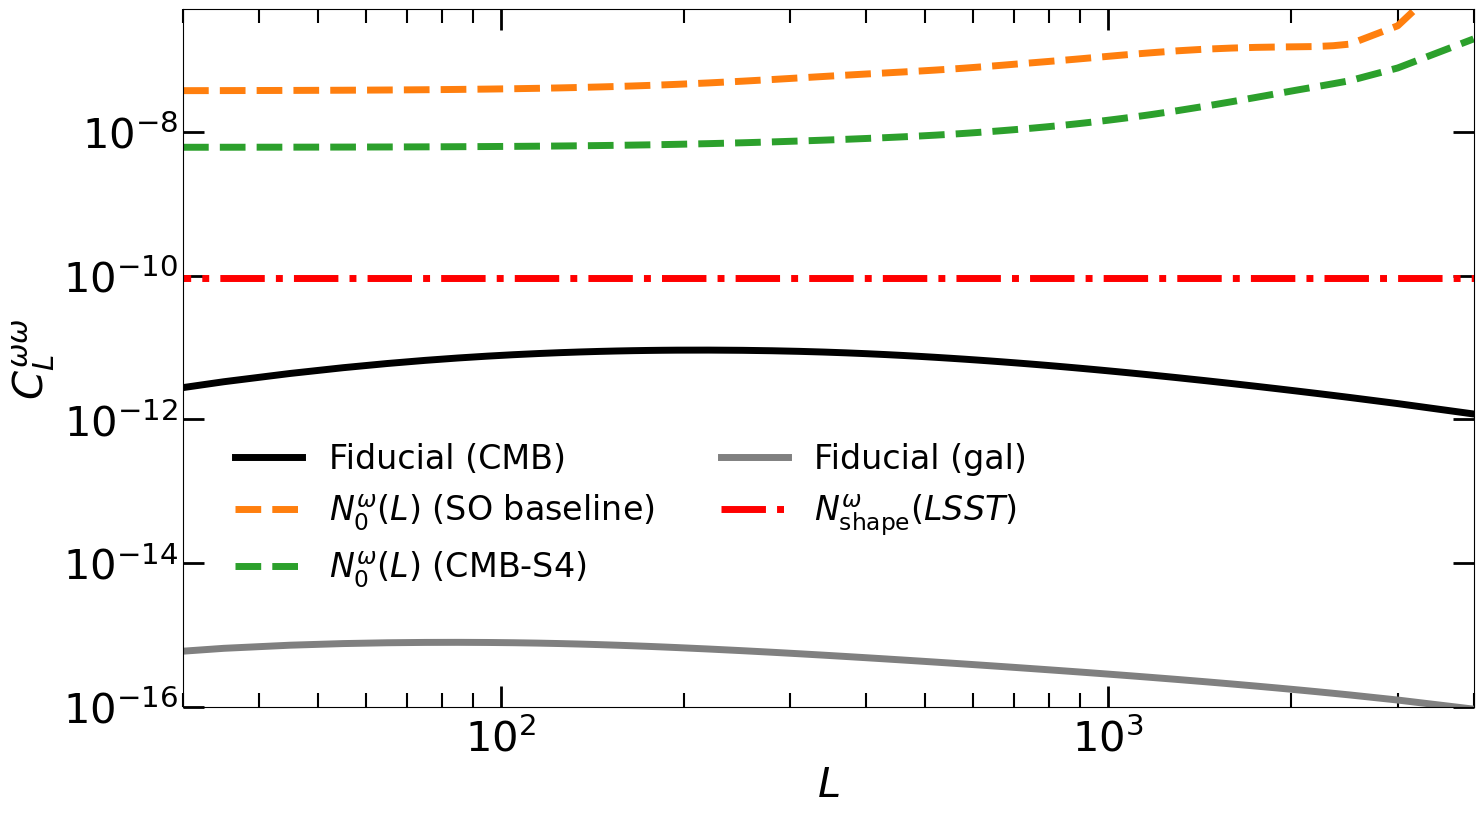

In [51]:
ellmax=4000
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)

ax.loglog(omega_Ls, my_omega_ps, label="Fiducial (CMB)", linewidth=5, color="k")

reduced_exps = ["SO_base", "S4_base"]
labels = ["SO baseline", "CMB-S4"]
for iii, exp in enumerate(reduced_exps):
    
    _noise.setup_cmb_noise(exp=exp)
    N_ww = _noise.get_N0("omega", ellmax=ellmax)
    ax.loglog(omega_Ls,N_ww[omega_Ls], linestyle="--", linewidth=5, color=exps.get_colour(exp))
    
    ax.plot([-1],[-1], label="$N^{\omega}_0(L)$" +f" ({labels[iii]})", color=exps.get_colour(exp), linewidth=5, linestyle="--")



N_ww = _noise.get_shape_N(ellmax=ellmax)
ax.loglog(omega_Ls, N_ww[omega_Ls], linestyle="dashdot", linewidth=5, color='r')
ax.loglog(omega_Ls, my_gal_omega_ps, label="Fiducial (gal)", linewidth=5, color="grey")
ax.plot([-1],[-1], label="$N^{\omega}_{\mathrm{shape}} (LSST)$", color='r', linewidth=5, linestyle="dashdot")


ax.legend(prop={'size': 24}, frameon=False, ncol=2, loc=(0.03,0.15))
ax.set_ylabel("$C_{L}^{\omega\omega}$", fontsize=30)
ax.set_xlabel("$L$", fontsize=30)
ax.set_ylim(1e-16, 5e-7)
ax.set_xlim(30, 4e3)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax.tick_params(labelsize=30)


# fig.savefig("_report_plots/omega_ps_all_plus_gal.pdf", bbox_inches='tight')
plt.show()


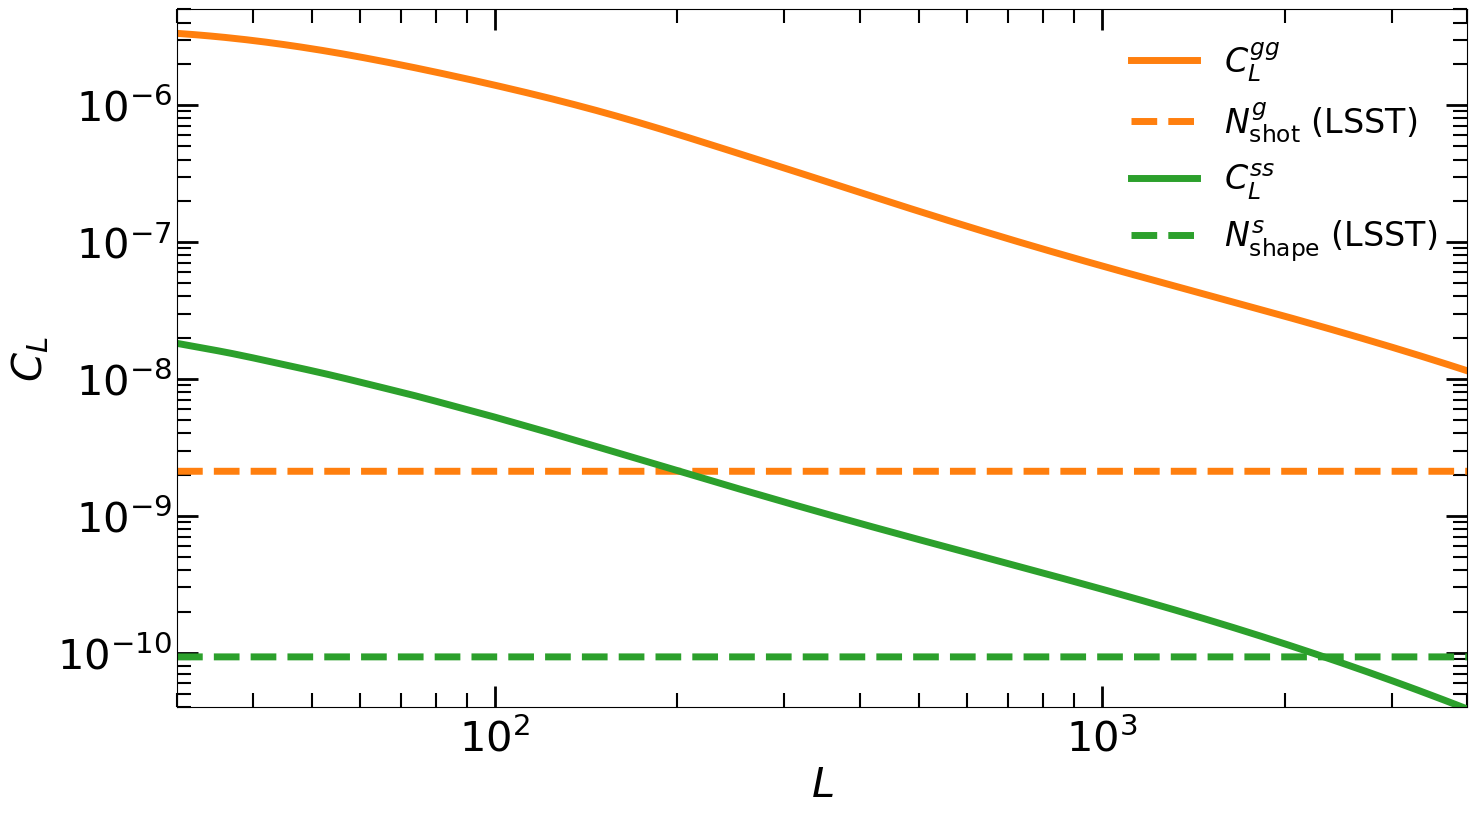

In [27]:
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)

ellmax = 4000
ells = np.arange(30, ellmax + 1, 1)

Cl_ss = power.get_gal_lens_ps(ells)
N_ss = _noise.get_shape_N()
Cl_gg = power.get_gal_ps(ells)
N_gg = _noise.get_gal_shot_N(ellmax=ellmax)

ax.loglog(ells, Cl_gg, label="$C_{L}^{gg}$", linewidth=5, color=u'#ff7f0e')
ax.loglog(ells,N_gg[ells], label="$N^g_{\mathrm{shot}}$ (LSST)", linestyle="--", linewidth=5, color=u'#ff7f0e')
ax.loglog(ells, Cl_ss, label="$C_{L}^{ss}$", linewidth=5, color=u'#2ca02c')
ax.loglog(ells,N_ss[ells], label="$N^s_{\mathrm{shape}}$ (LSST)", linestyle="--", linewidth=5, color=u'#2ca02c')

ax.set_ylabel("$C_{L}$", fontsize=30)
ax.set_xlabel("$L$", fontsize=30)
ax.set_xlim(30,4000)
ax.set_ylim(4e-11, 5e-6)
ax.legend(prop={'size': 24}, frameon=False, loc=1)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax.tick_params(labelsize=30)
# fig.savefig("_report_plots/gal_shear_ps.pdf", bbox_inches='tight')
plt.show()

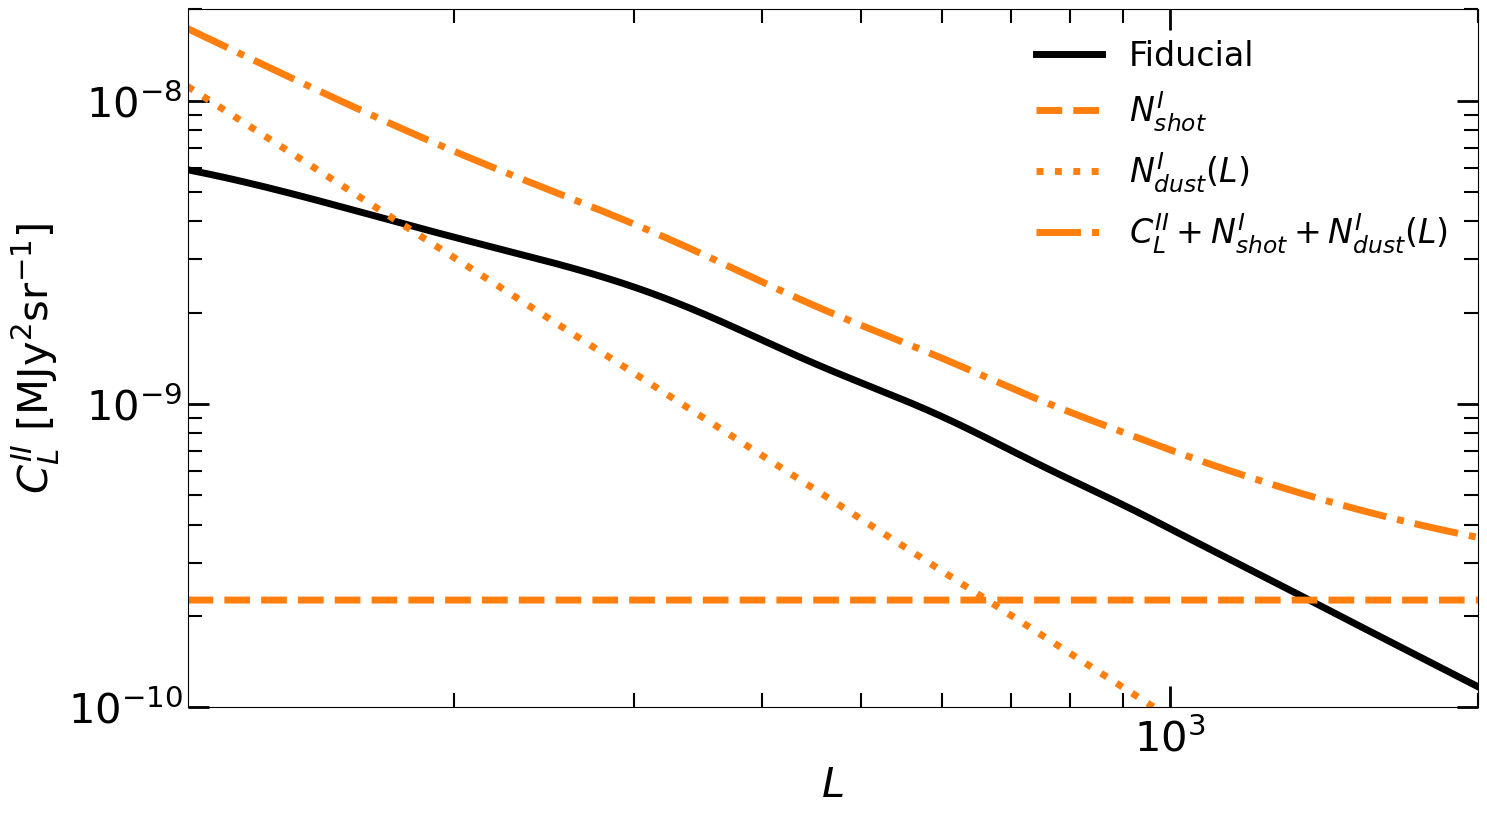

In [28]:
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)

ells = np.arange(110, 2000 + 1, 1)

Cl_II = power.get_cib_ps(ells, nu=353e9)
N_II = _noise.get_cib_shot_N(nu=353e9, ellmax=ellmax)
N_dust = _noise.get_dust_N(nu=353e9, ellmax=ellmax)

ax.loglog(ells, Cl_II, label="Fiducial", linewidth=5, color="k")
ax.loglog(ells, N_II[ells], label="$N^{I}_{shot}$", linestyle="--", linewidth=5, color=u'#ff7f0e')
ax.loglog(ells, N_dust[ells], label="$N^{I}_{dust}(L)$", linestyle=":", linewidth=5, color=u'#ff7f0e')
ax.loglog(ells, (Cl_II + N_II[ells] + N_dust[ells]), label="$C^{II}_L + N^{I}_{shot} + N^{I}_{dust}(L)$",linestyle="dashdot", linewidth=5, color=u'#ff7f0e')

ax.set_ylabel("$C_{L}^{II}$ [MJy$^2$sr$^{-1}$]", fontsize=30)
ax.set_xlabel("$L$", fontsize=30)
ax.set_xlim(110, 2000)
ax.set_ylim(1e-10,2e-8)
ax.legend(prop={'size': 24}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax.tick_params(labelsize=30)
# fig.savefig("_report_plots/cib_ps.pdf", bbox_inches='tight')
plt.show()

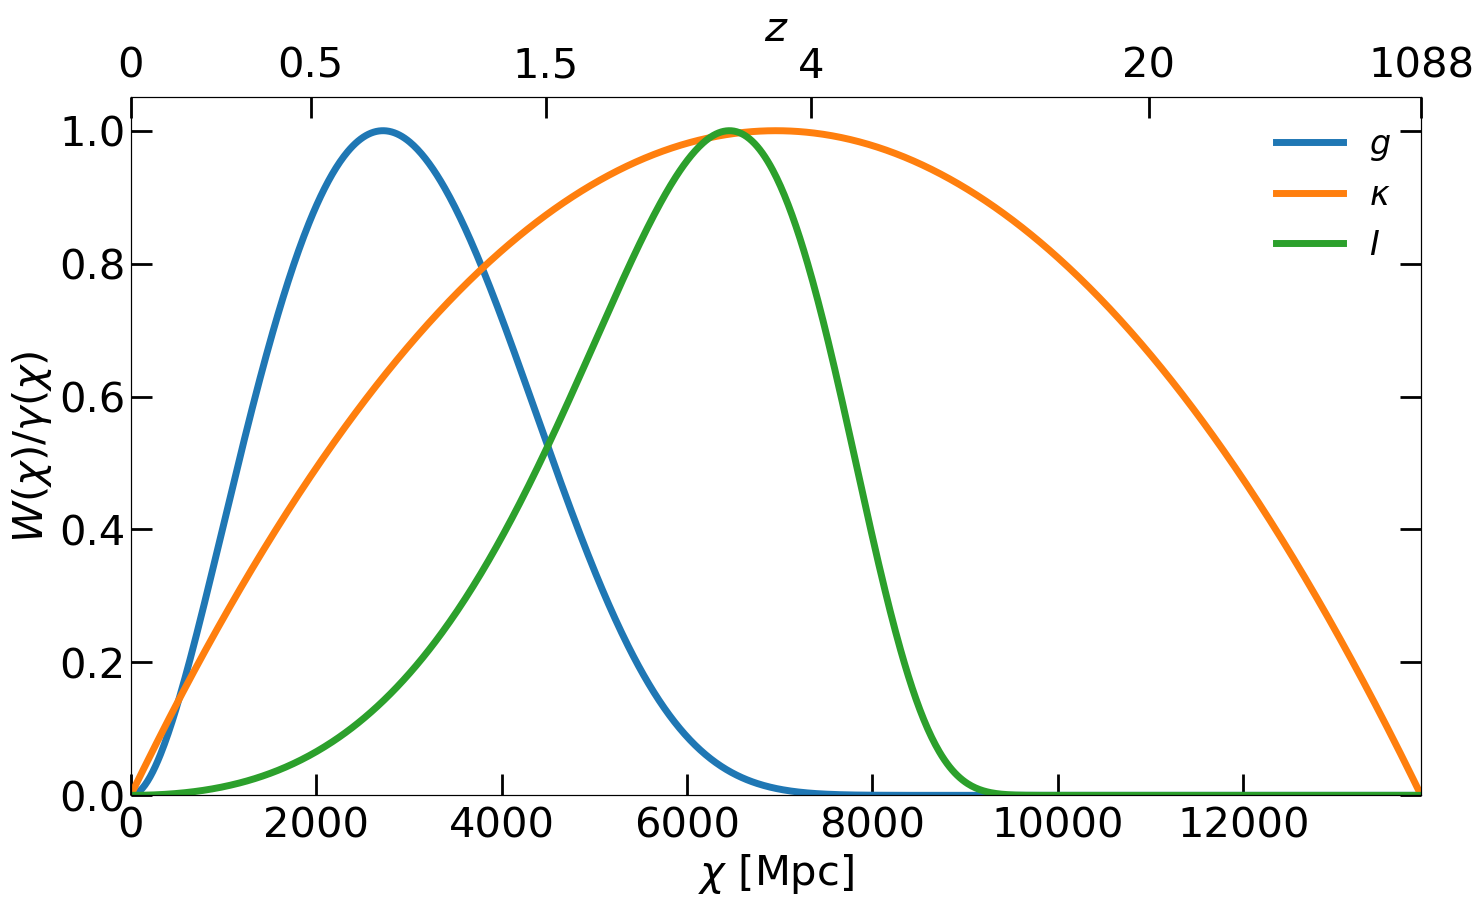

In [8]:
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)

nu = 353e9
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)

Chi_str = cosmo.get_chi_star()
Chis = np.linspace(1, Chi_str, 1000)
zs = cosmo.Chi_to_z(Chis)

conv_fac = 1/cosmo.poisson_factor(zs)*Chis**2
gal_window_Chi = cosmo.gal_window_Chi(Chis)*conv_fac
cmb_window_Chi = cosmo.cmb_lens_window_matter(Chis, Chi_str)*conv_fac
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)*conv_fac
gal_lens_window_Chi = cosmo.gal_lens_window_matter(Chis, Chi_str)*conv_fac

ax.plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$g$", linewidth=5)
ax.plot(Chis, cmb_window_Chi/np.max(cmb_window_Chi), label="$\kappa$", linewidth=5)
ax.plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$I$", linewidth=5)
# ax.plot(Chis, gal_lens_window_Chi/np.max(gal_lens_window_Chi), label="$s$", linewidth=5)

ax.set_xlabel("$\chi$ [Mpc]", fontsize=30)
ax.set_ylabel(r"$W(\chi)/\gamma(\chi)$", fontsize=30)
ax.set_ylim(0,1.05)
plt.xlim(0,cosmo.get_chi_star())
ax.legend(prop={'size': 24}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax.tick_params(labelsize=30)


ax2 = ax.twiny()
ax2.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax2.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax2.tick_params(labelsize=30)
ax2.set_xlim(ax.get_xlim())
zs_ticks = np.array([0, 0.5, 1.5, 4, 20, cosmo.Chi_to_z(cosmo.get_chi_star())])
ax2.set_xticks(cosmo.z_to_Chi(zs_ticks))
ax2.set_xticklabels(["%.4g" % z for z in zs_ticks])
ax2.set_xlabel(r"$z$", fontsize=30)

# fig.savefig("_report_plots/windows.pdf", bbox_inches='tight')
plt.show()


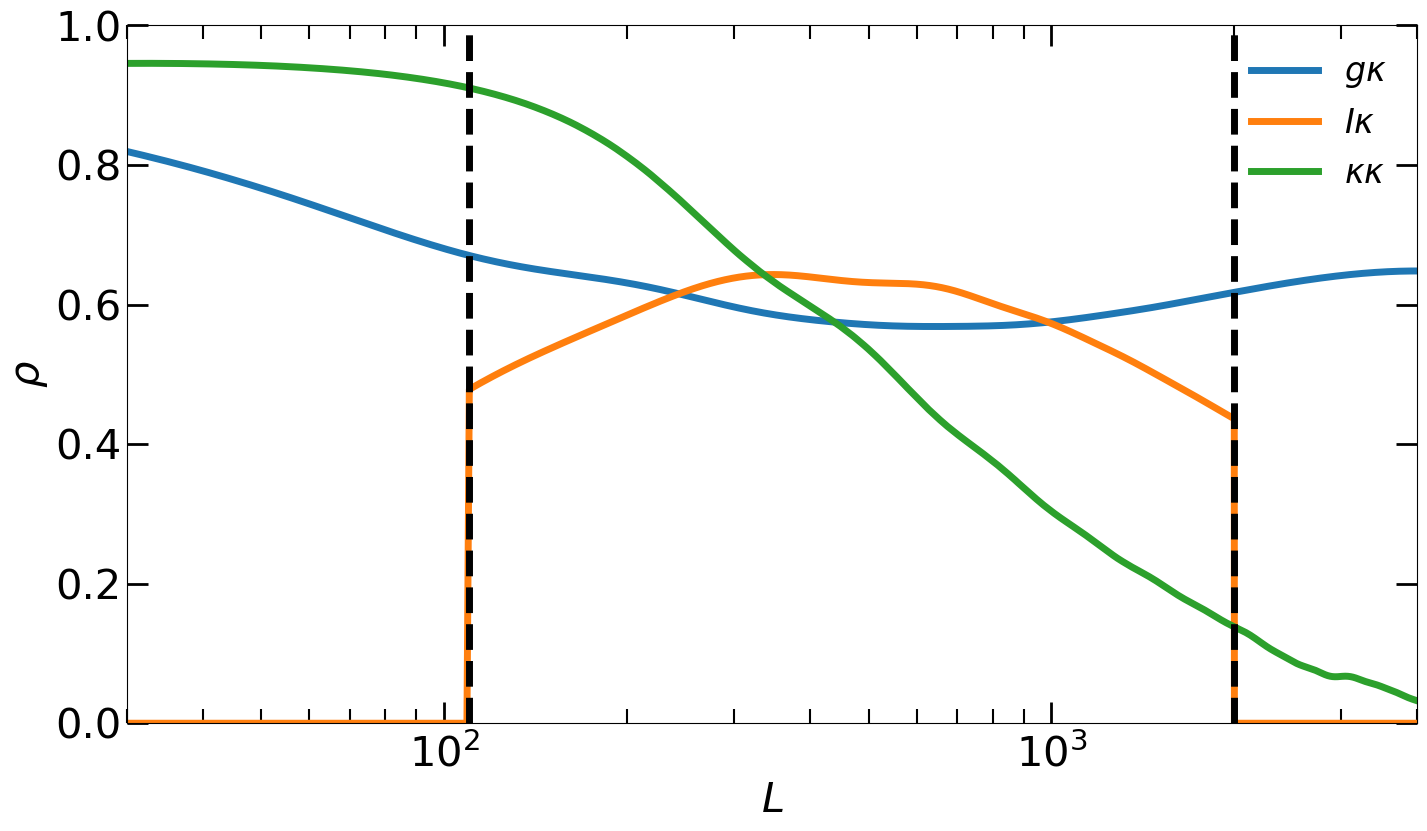

In [17]:
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)

ellmax = 4000
ells2 = np.arange(ellmax + 1)

typs = ["gk", "Ik", "sk", "gI"]
labels = ["$g\kappa$", "$I\kappa$", "$s\kappa$", "$gI$"]
for iii, typ in enumerate(typs[:2]):
    
    corr = fisher.covariance.get_corr(typ, ellmax, include_kappa_noise=False)
    plt.semilogx(ells2, corr, label=labels[iii], linewidth=5)

_noise.setup_cmb_noise(exp="SO_base", ps="gradient")
N_kk = _noise.get_N0("kappa", ellmax=ellmax)
corr_kk = Cl_kk/(np.sqrt((Cl_kk + N_kk[ells])*Cl_kk))
ax.semilogx(ells, corr_kk, label=f"$\kappa\kappa$", linewidth=5)

ax.semilogx([110,110],[0,1],linestyle="--",color="k",linewidth=5)
ax.semilogx([2000,2000],[0,1],linestyle="--",color="k",linewidth=5)

ax.set_ylabel(r"$\rho$", fontsize=30)
ax.set_xlabel("$L$", fontsize=30)
ax.set_xlim(30,4000)
ax.set_ylim(0,1)
ax.legend(prop={'size': 24}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax.tick_params(labelsize=30)
# fig.savefig("_report_plots/corr.pdf", bbox_inches='tight')
plt.show()

Time = 236.86755681037903


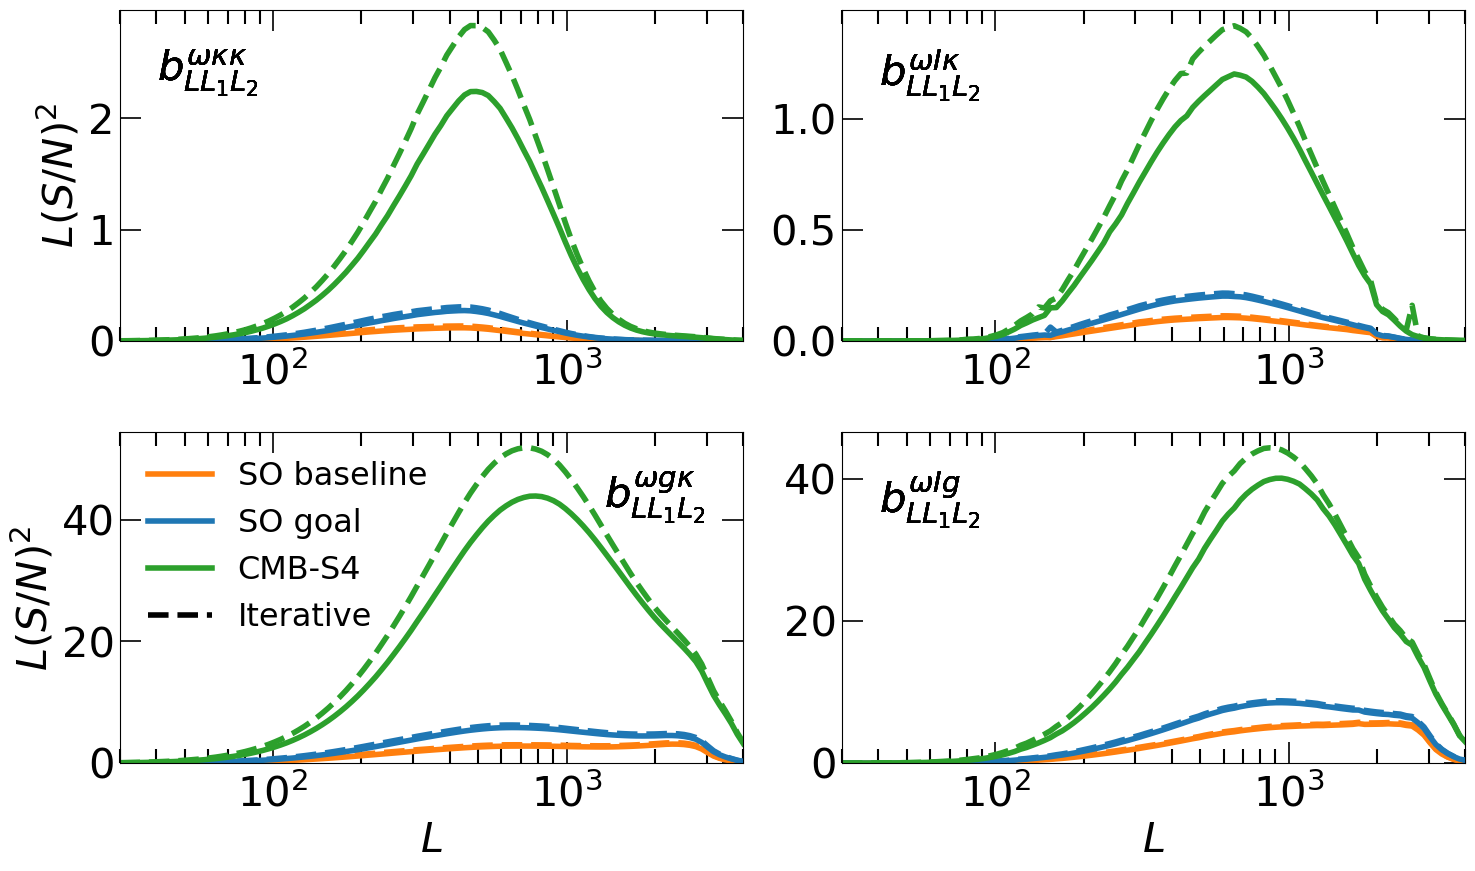

In [22]:
fig, ax = plt.subplots(2,2)
fig.tight_layout(pad=4)

Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
Ntheta=100
t0 = time.time()
label_typs = ["$b^{\omega\kappa\kappa}_{LL_1L_2}$", "$b^{\omega g\kappa}_{LL_1L_2}$", "$b^{\omega I\kappa}_{LL_1L_2}$", "$b^{\omega Ig}_{LL_1L_2}$"]
typs = ["kkw", "gkw", "Ikw", "Igw"]
labels = ["SO baseline", "SO goal", "CMB-S4"]
its = [True, False]
for iii, exp in enumerate(exps.get_exps()):
    for kkk, it in enumerate(its):
        fisher.setup_noise(exp=exp,ps="gradient", iter=it)
        linestyle="--" if it else "-"
        for jjj, typ in enumerate(typs):
            F_conv_rot = fisher.get_bispectrum_Fisher(typ, Ls=Ls, Ntheta=Ntheta, f_sky=0.4, arr=True)
            col = jjj//2
            if jjj % 2: row = 1
            else: row = 0
            if row == 1 and col == 0:
                anchored_text = AnchoredText(f"{label_typs[jjj]}", loc=1, frameon=False, prop={'size': 30})
            else:
                anchored_text = AnchoredText(f"{label_typs[jjj]}", loc=2, frameon=False, prop={'size': 30})
            ax[row][col].add_artist(anchored_text)
            if not it:
                ax[row][col].semilogx(Ls, Ls*F_conv_rot, label=f"{labels[iii]}", color=exps.get_colour(exp), linewidth=4, linestyle=linestyle)
            else:
                ax[row][col].semilogx(Ls, Ls*F_conv_rot, color=exps.get_colour(exp), linewidth=4, linestyle=linestyle)                
            ax[row][col].tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
            ax[row][col].tick_params(top=True, right=True, direction="in", which="major", length=15, width=1.2)
            ax[row][col].tick_params(labelsize=30)
            ax[row][col].set_xlim(30,4000)
            if iii==2:
                ax[row][col].set_ylim(bottom=0)
                
            if row == 1:
                ax[row][col].set_xlabel("$L$", fontsize=30)
            if col == 0:
                ax[row][col].set_ylabel("$L(S/N)^2$", fontsize=30)
                
ax[1][0].plot([-1],[-1], linestyle="--", label="Iterative", color="k", linewidth=4)
ax[1][0].legend(prop={'size': 23}, frameon=False)
            
t1 = time.time()
print(f"Time = {t1 - t0}")

# fig.savefig("_report_plots/bi_fish_reduced.pdf", bbox_inches='tight')
plt.show()

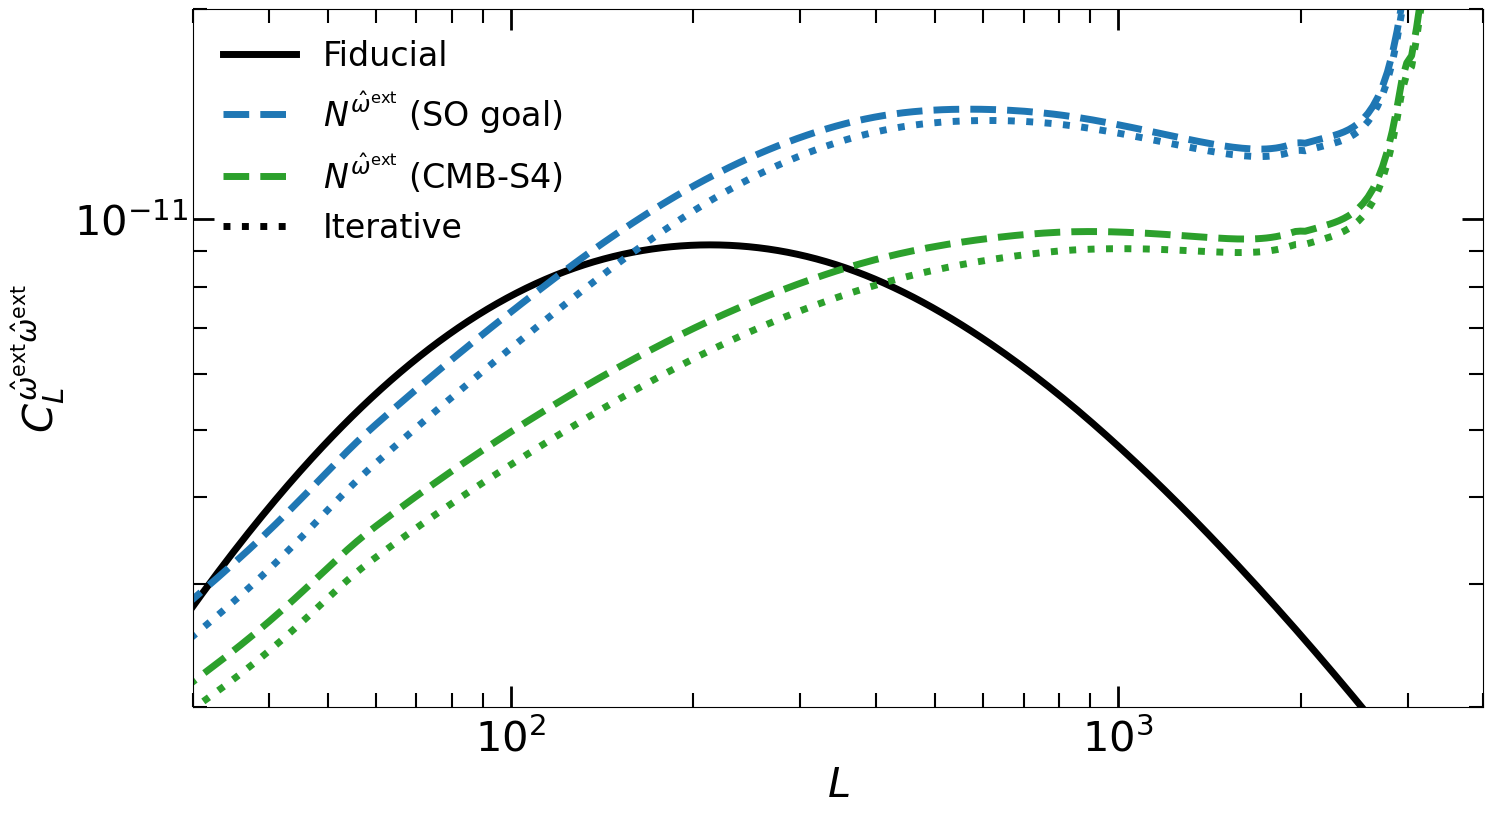

In [31]:
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)

Ls = np.load("_results/F_L_results/kgI/SO_goal/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_kgI_SO_goal = np.load("_results/F_L_results/kgI/SO_goal/gmv/TEB/30_3000/1_2000/F_L.npy")
F_L_kgI_SO_goal_it = np.load("_results/F_L_results/kgI/SO_goal/gmv_iter/TEB/30_3000/1_2000/F_L.npy")
F_L_kgI_S4_base = np.load("_results/F_L_results/kgI/S4_base/gmv/TEB/30_3000/1_2000/F_L.npy")
F_L_kgI_S4_base_it = np.load("_results/F_L_results/kgI/S4_base/gmv_iter/TEB/30_3000/1_2000/F_L.npy")

my_omega_ps_spline = InterpolatedUnivariateSpline(omega_Ls, my_omega_ps)
ax.loglog(Ls, my_omega_ps_spline(Ls), label="Fiducial", linewidth=5, color="k")

ax.loglog(Ls, my_omega_ps_spline(Ls)/F_L_kgI_SO_goal - my_omega_ps_spline(Ls), linewidth=5, linestyle="--", color=exps.get_colour("SO_goal"))
ax.loglog(Ls, my_omega_ps_spline(Ls)/F_L_kgI_SO_goal_it - my_omega_ps_spline(Ls), linewidth=5, linestyle=":",color=exps.get_colour("SO_goal"))
ax.loglog(Ls, my_omega_ps_spline(Ls)/F_L_kgI_S4_base - my_omega_ps_spline(Ls), linewidth=5, linestyle="--",color=exps.get_colour("S4_base"))
ax.loglog(Ls, my_omega_ps_spline(Ls)/F_L_kgI_S4_base_it - my_omega_ps_spline(Ls), linewidth=5, linestyle=":",color=exps.get_colour("S4_base"))

ax.plot([-1],[-1], label="$N^{\hat{\omega}^{\mathrm{ext}}}$ (SO goal)", color=exps.get_colour("SO_goal"), linewidth=5, linestyle="--")
ax.plot([-1],[-1], label="$N^{\hat{\omega}^{\mathrm{ext}}}$ (CMB-S4)", color=exps.get_colour("S4_base"), linewidth=5, linestyle="--")
ax.plot([-1],[-1], label="Iterative", color="k", linewidth=5, linestyle=":")


ax.set_ylabel("$C^{\hat{\omega}^{\mathrm{ext}}\hat{\omega}^{\mathrm{ext}}}_{L}$", fontsize=30)
ax.set_xlabel("$L$", fontsize=30)
ax.set_xlim(30,4000)
ax.set_ylim(2e-12,2e-11)
ax.legend(prop={'size': 24}, frameon=False, handlelength=2.2)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax.tick_params(labelsize=30)

t1 = time.time()
# fig.savefig("_report_plots/omega_lss_ps_single_all.pdf", bbox_inches='tight')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '_results/F_L_results/kg/SO_base/gmv/TEB/30_3000/1_2000/Ls.npy'

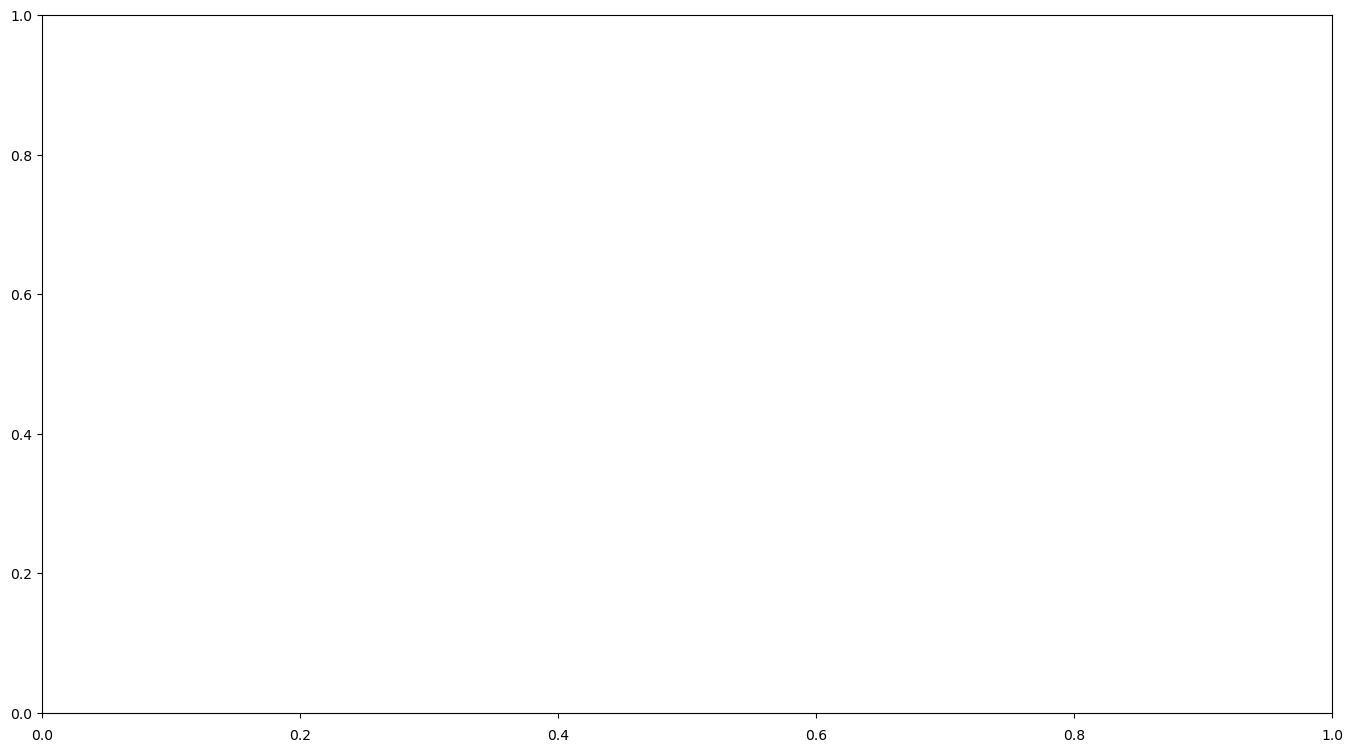

In [7]:
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$a\in\{\kappa, g\}$", "$a\in\{\kappa, I\}$", "$a\in\{g, I\}$", "$a\in\{\kappa, g, I\}$"]
for iii, typ in enumerate(typs):
    Ls = np.load(f"_results/F_L_results/{typ}/SO_base/gmv/TEB/30_3000/1_2000/Ls.npy")
    F_L = np.load(f"_results/F_L_results/{typ}/SO_base/gmv/TEB/30_3000/1_2000/F_L.npy")
    ax.semilogx(Ls, np.sqrt(F_L), label=label_typs[iii], linewidth=5)

ax.set_ylabel(r'$\rho_{\omega\hat{\omega}^{\mathrm{ext}}}$', fontsize=30)
ax.set_xlabel("$L$", fontsize=30)
ax.set_xlim(30,4000)
ax.set_ylim(0,1)
ax.legend(prop={'size': 24}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax.tick_params(labelsize=30)
# fig.savefig("_report_plots/omega_corr_SO.pdf", bbox_inches='tight')
plt.show()

L bins: [  30.           40.           55.57981977   77.22790916  107.30783181
  149.10374881  207.17898717  287.8742692   400.          555.79819775
  772.27909155 1073.07831811 1491.03748813 2071.78987169 2878.742692
 4000.        ]


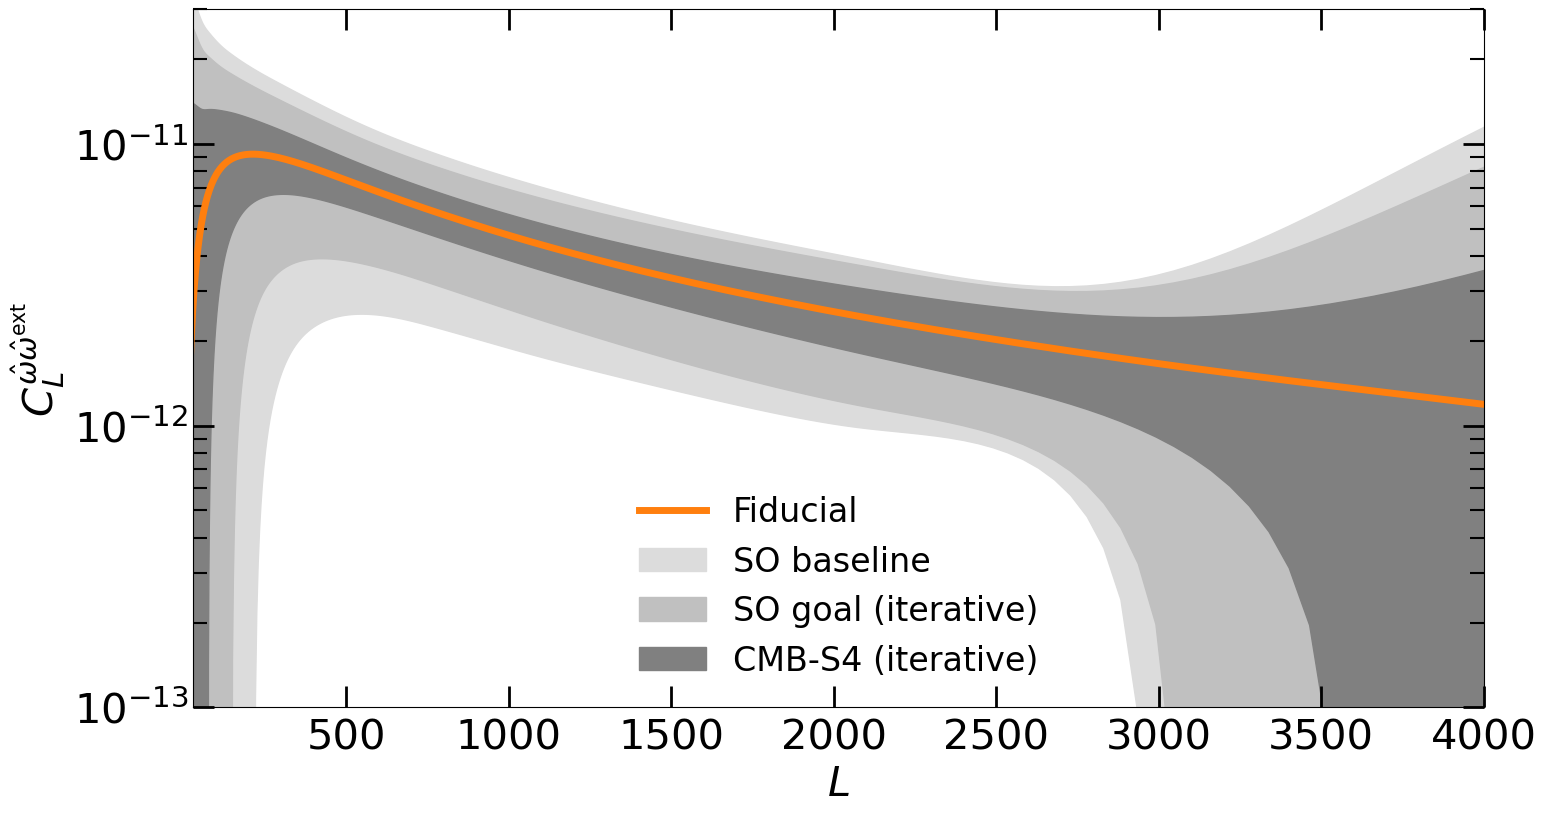

In [42]:
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)

Ls = np.load("_results/F_L_results/kgI/SO_goal/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_kgI_SO_base = np.load("_results/F_L_results/kgI/SO_base/gmv/TEB/30_3000/1_2000/F_L.npy")
F_L_kgI_SO_goal = np.load("_results/F_L_results/kgI/SO_goal/gmv/TEB/30_3000/1_2000/F_L.npy")
F_L_kgI_SO_goal_it = np.load("_results/F_L_results/kgI/SO_goal/gmv_iter/TEB/30_3000/1_2000/F_L.npy")
F_L_kgI_S4_base = np.load("_results/F_L_results/kgI/S4_base/gmv/TEB/30_3000/1_2000/F_L.npy")
F_L_kgI_S4_base_it = np.load("_results/F_L_results/kgI/S4_base/gmv_iter/TEB/30_3000/1_2000/F_L.npy")

F_L_kgI_SO_base_spline = InterpolatedUnivariateSpline(Ls, F_L_kgI_SO_base)
F_L_kgI_SO_goal_spline = InterpolatedUnivariateSpline(Ls, F_L_kgI_SO_goal)
F_L_kgI_S4_base_spline = InterpolatedUnivariateSpline(Ls, F_L_kgI_S4_base)

omega_ps_spline = InterpolatedUnivariateSpline(omega_Ls, my_omega_ps)

Ls1 = np.arange(30,40,10)
Ls2 = np.logspace(1, 3, 15)*4
Ls_sig = np.concatenate((Ls1,Ls2))
print(f"L bins: {Ls_sig}")

Ls_sig_big = np.concatenate((Ls1,Ls2))
Ls_sig_big = np.append(Ls_sig_big, Ls_sig[-1]+(Ls_sig[-1]-Ls_sig[-2]))
Ls_sig_big = np.append([Ls_sig[0]-(Ls_sig[1]-Ls_sig[0])], Ls_sig_big)
ns = [(Ls_sig_big[iii]-Ls_sig_big[iii])/2 + (Ls_sig_big[iii+1]-Ls_sig_big[iii-1])/2 for iii in range(1, np.size(Ls_sig)+1)]

fsky = 0.4
labels = ["SO baseline", "SO goal (iterative)", "CMB-S4 (iterative)"]
colours = ["gainsboro", "silver", "grey"]

ax.plot(Ls, omega_ps_spline(Ls), label="Fiducial", linewidth=5, color=u'#ff7f0e')
F_Ls = [F_L_kgI_SO_base_spline(Ls_sig), F_L_kgI_SO_goal_spline(Ls_sig), F_L_kgI_S4_base_spline(Ls_sig)]

for iii, exp in enumerate(exps.get_exps()):

    _noise.setup_cmb_noise(exp=exp)
    N_ww = _noise.get_N0("omega", ellmax=ellmax)
    N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
    sig2 = ((omega_ps_spline(Ls_sig)+N_ww_spline(Ls_sig))*omega_ps_spline(Ls_sig)/F_Ls[iii] + omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
    sig = np.sqrt(sig2/fsky)
    err = sig/(np.sqrt(ns))
    err_spline = InterpolatedUnivariateSpline(Ls_sig,err)
    ax.plot(Ls, omega_ps_spline(Ls)+err_spline(Ls), linewidth=5, linestyle="--", alpha=0)
    ax.semilogy(Ls, omega_ps_spline(Ls)-err_spline(Ls), linewidth=5, linestyle="--", alpha=0)
    ax.fill_between(Ls, omega_ps_spline(Ls)+err_spline(Ls),omega_ps_spline(Ls)-err_spline(Ls), color=colours[iii], alpha=1, label=labels[iii])



ax.set_ylabel("$C^{\hat{\omega}\hat{\omega}^{\mathrm{ext}}}_{L}$", fontsize=30)
ax.set_xlabel("$L$", fontsize=30)
ax.set_xlim(30,4000)
ax.set_ylim(1e-13,3e-11)
ax.legend(prop={'size': 24}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=10, width=1.5)
ax.tick_params(top=True, right=True, direction="in", which="major", length=15, width=2)
ax.tick_params(labelsize=30)


# fig.savefig("_report_plots/omega_cross_binned_semilogy_fsky.pdf", bbox_inches='tight')
plt.show()